In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [92]:
df  = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


#### there are no null values

In [93]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

## EDA

### checking the type of data whether continuous, discrete or categorical features

    All value are of categorical features

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

#### Visualization 
    checking the dependency with the dependent variable. 
    But before we have to change the dependent categorical variable in numerical form i.e, Class with the help of one hot encoding

In [95]:
df['class'] = pd.get_dummies(df['class'] ,drop_first=True)

In [96]:
len(df['cap-shape'].unique())

6

In [97]:
### function to check the sum and different  unique value in categorical features
def impute_uniquefeature(df,variable):
    print('No of Unique values in ',variable,' is : ',len(df[variable].unique()))
    print('Unique values are :  ',df[variable].unique())
    print()


In [98]:
for feature in df.columns[1:]:
    impute_uniquefeature(df,feature)

No of Unique values in  cap-shape  is :  6
Unique values are :   ['x' 'b' 's' 'f' 'k' 'c']

No of Unique values in  cap-surface  is :  4
Unique values are :   ['s' 'y' 'f' 'g']

No of Unique values in  cap-color  is :  10
Unique values are :   ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']

No of Unique values in  bruises  is :  2
Unique values are :   ['t' 'f']

No of Unique values in  odor  is :  9
Unique values are :   ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']

No of Unique values in  gill-attachment  is :  2
Unique values are :   ['f' 'a']

No of Unique values in  gill-spacing  is :  2
Unique values are :   ['c' 'w']

No of Unique values in  gill-size  is :  2
Unique values are :   ['n' 'b']

No of Unique values in  gill-color  is :  12
Unique values are :   ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']

No of Unique values in  stalk-shape  is :  2
Unique values are :   ['e' 't']

No of Unique values in  stalk-root  is :  5
Unique values are :   ['e' 'c' 'b' 'r' '?']

No of Unique value

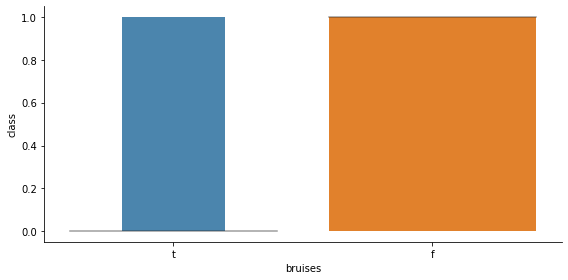

In [99]:
### Ploting catlot to check the dependency
sns.catplot(y = "class", x= "bruises", data=df.sort_values("class", ascending=False),kind="boxen", height = 4, aspect = 2)


### Feature Engineering

In [112]:
columns_to_remove=df.columns[1:]

In [113]:
columns_to_remove

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [114]:
### Function to convert categorical to numerical using one hot encoding
def conv_cat_to_int(df,variable):
    variable = df[[variable]]
    variable = pd.get_dummies(variable,drop_first=True)
    return variable

In [115]:
Encoded_categorical=[]
for feature in df.columns[1:]:
    df=pd.concat([df,conv_cat_to_int(df,feature)],axis=1)

In [116]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,x,s,n,t,p,f,c,n,k,...,0,1,0,0,0,0,0,0,1,0
1,0,x,s,y,t,a,f,c,b,k,...,1,0,0,0,1,0,0,0,0,0
2,0,b,s,w,t,l,f,c,b,n,...,1,0,0,0,0,0,1,0,0,0
3,1,x,y,w,t,p,f,c,n,n,...,0,1,0,0,0,0,0,0,1,0
4,0,x,s,g,f,n,f,w,b,k,...,0,0,0,0,1,0,0,0,0,0


In [117]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       ...
       'population_n', 'population_s', 'population_v', 'population_y',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=118)

In [118]:
df.drop(labels=columns_to_remove,axis=1,inplace=True)

In [119]:
df.head()

,class,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


## Feature Selection

In [127]:

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
pd.pandas.set_option('display.max_columns', None)

In [120]:
y=df.iloc[:,1]

In [121]:
X=df.drop('class',axis=1)

In [124]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) 
feature_sel_model.fit(X, y)


SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [125]:
feature_sel_model.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [129]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 95
selected features: 0


In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=101)

In [131]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

In [132]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in a random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# maximum number of Levels in tree
max_depth = [int(x) for x in np.linspace(10,1000,10)]
# minimum number of samples required to split a node
min_samples_split = [2,3,4,5,7,9]
# minimum number of samples required at each leaf node
min_samples_leaf = [2,4,6,8]
# create the random grid
random_grid = {'n_estimators' : n_estimators,
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,
              'criterion' : ['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 3, 4, 5, 7, 9], 'min_samples_leaf': [2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [133]:
randomizedSearchCV = RandomizedSearchCV(classifier,param_distributions=random_grid, n_jobs=-1,cv=5,verbose=2)

In [134]:
randomizedSearchCV.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.3min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 4, 6, 8],
                                        'min_samples_split': [2, 3, 4, 5, 7, 9],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   verbose=2)

In [135]:
y_pred=randomizedSearchCV.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9993846153846154
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1624
           1       0.00      0.00      0.00         1

    accuracy                           1.00      1625
   macro avg       0.50      0.50      0.50      1625
weighted avg       1.00      1.00      1.00      1625

[[1624    0]
 [   1    0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
